In [1]:
import pandas as pd

df = pd.read_csv("subset_test_cs2cd.csv")

C:\Users\kilua\AppData\Local\Temp\ipykernel_25956\3233268808.py:3: DtypeWarning: Columns (9,22,31,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("subset_test_cs2cd.csv")


In [2]:
df.head()

,X,Y,Z,tick,steamid,velocity_X,velocity_Y,velocity_Z,is_airborne,is_walking,...,approximate_spotted_by,is_scoped,health,armor_value,is_alive,is_cheater,map,server,avg_rank,match_making_type
0,2397.00000,2079.000000,132.76755,1,Player_7,NaN,NaN,NaN,False,False,...,[],False,100.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
1,-1498.16320,500.293600,-63.96875,1,Player_1,NaN,NaN,NaN,False,False,...,[],False,17.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
2,181.65054,634.895400,81.24522,1,Player_4,NaN,NaN,NaN,False,False,...,[],False,23.0,99.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
3,-1666.27230,480.882400,-63.96875,1,Player_2,NaN,NaN,NaN,False,False,...,[],False,100.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
4,1066.82300,28.896843,256.03125,1,Player_6,NaN,NaN,NaN,False,True,...,[],False,14.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574030 entries, 0 to 1574029
Data columns (total 44 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   X                         1556037 non-null  float64
 1   Y                         1556037 non-null  float64
 2   Z                         1556037 non-null  float64
 3   tick                      1574030 non-null  int64  
 4   steamid                   1574030 non-null  object 
 5   velocity_X                1555978 non-null  float64
 6   velocity_Y                1555978 non-null  float64
 7   velocity_Z                1555978 non-null  float64
 8   is_airborne               1574030 non-null  bool   
 9   is_walking                1556037 non-null  object 
 10  yaw                       1556037 non-null  float64
 11  pitch                     1556037 non-null  float64
 12  usercmd_mouse_dx          1554142 non-null  float64
 13  usercmd_mouse_dy          1

In [18]:
import pandas as pd

# --- Configuración para mostrar siempre todas las columnas ---
pd.set_option('display.max_columns', None)

# Cargas tu DataFrame
df = pd.read_csv('new_subset_test_cs2cd.csv')

# Ahora, cuando uses .head(), verás todas las columnas sin truncar
print("Mostrando las primeras 3 filas con todas las columnas visibles:")
print(df.head(3))

C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\2352413942.py:7: DtypeWarning: Columns (9,22,31,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_subset_test_cs2cd.csv')


Mostrando las primeras 3 filas con todas las columnas visibles:
            X          Y          Z  tick   steamid  velocity_X  velocity_Y  \
0  2397.00000  2079.0000  132.76755     1  Player_7         NaN         NaN   
1 -1498.16320   500.2936  -63.96875     1  Player_1         NaN         NaN   
2   181.65054   634.8954   81.24522     1  Player_4         NaN         NaN   

   velocity_Z  is_airborne is_walking        yaw      pitch  usercmd_mouse_dx  \
0         NaN        False      False  135.00000   0.000000               NaN   
1         NaN        False      False -105.04543  15.950775               NaN   
2         NaN        False      False  -18.20813  -1.528809               NaN   

   usercmd_mouse_dy  usercmd_viewangle_x  usercmd_viewangle_y  \
0               NaN                  NaN                  NaN   
1               NaN                  NaN                  NaN   
2               NaN                  NaN                  NaN   

                                 

In [4]:
# Asumiendo que tu DataFrame se llama 'df'
# Creamos una nueva columna que calcula la diferencia de bajas con la fila anterior,
# agrupando por jugador para no mezclar datos.
df['new_kill'] = df.groupby('steamid')['kills_total'].diff()

# Los eventos de baja son aquellos donde la diferencia es 1.
kill_events_df = df[df['new_kill'] == 1].copy()

print(f"Se identificaron {len(kill_events_df)} eventos de baja en el dataset.")

Se identificaron 192 eventos de baja en el dataset.


In [5]:
# Lista para guardar los datos de análisis de cada ventana pre-kill
pre_kill_data = []

# Iteramos sobre cada evento de baja que encontramos
for index, kill_event in kill_events_df.iterrows():
    steam_id = kill_event['steamid']
    kill_tick = kill_event['tick']
    is_cheater = kill_event['is_cheater']
    
    # Definimos la ventana de tiempo (3 segundos antes de la baja)
    start_tick = kill_tick - (64 * 3)
    
    # Seleccionamos todos los datos de ese jugador en esa ventana de tiempo
    pre_kill_window_df = df[(df['steamid'] == steam_id) & (df['tick'] >= start_tick) & (df['tick'] < kill_tick)]
    
    if not pre_kill_window_df.empty:
        # Calculamos estadísticas de los movimientos del ratón en esa ventana
        mouse_variance = pre_kill_window_df['usercmd_mouse_dx'].var() + pre_kill_window_df['usercmd_mouse_dy'].var()
        mouse_abs_sum = pre_kill_window_df['usercmd_mouse_dx'].abs().sum() + pre_kill_window_df['usercmd_mouse_dy'].abs().sum()
        
        pre_kill_data.append({
            'variance': mouse_variance,
            'abs_sum': mouse_abs_sum,
            'is_cheater': is_cheater
        })

# Convertimos la lista de resultados a un nuevo DataFrame para el análisis
pre_kill_analysis_df = pd.DataFrame(pre_kill_data)

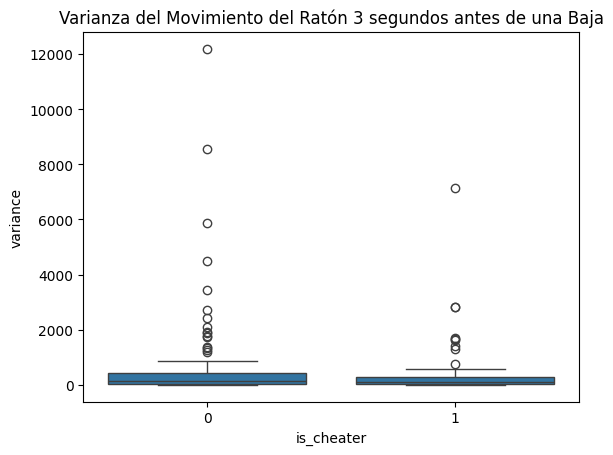

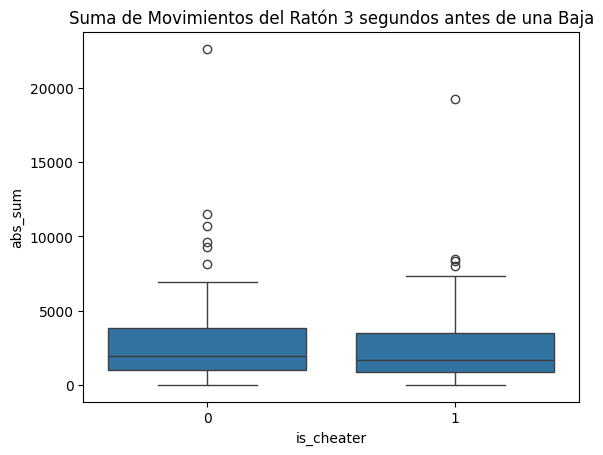

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparamos la varianza del movimiento del ratón
sns.boxplot(x='is_cheater', y='variance', data=pre_kill_analysis_df)
plt.title('Varianza del Movimiento del Ratón 3 segundos antes de una Baja')
plt.show()

# Comparamos la suma de movimientos absolutos
sns.boxplot(x='is_cheater', y='abs_sum', data=pre_kill_analysis_df)
plt.title('Suma de Movimientos del Ratón 3 segundos antes de una Baja')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import time

print("Iniciando el proceso de ingeniería de características...")

# --- Paso 1: Cargar el Dataset ---
# RECUERDA: Cambia 'tu_dataset_reducido.csv' por el nombre de tu archivo.
try:
    df = pd.read_csv('subset_test_cs2cd.csv')
    print(f"Dataset cargado exitosamente. Forma: {df.shape}")
except FileNotFoundError:
    print("Error: No se encontró el archivo del dataset. Asegúrate de que el nombre es correcto.")
    exit()

# --- Paso 2: Identificar los Eventos de "Kill" ---
start_time = time.time()
print("Identificando eventos de baja (kills)...")
# Calculamos la diferencia de bajas con la fila anterior, agrupando por jugador
df['new_kill'] = df.groupby('steamid')['kills_total'].diff()

# Los eventos de baja son aquellos donde la diferencia es 1.
kill_events_df = df[df['new_kill'] == 1].copy()
print(f"Se identificaron {len(kill_events_df)} eventos de baja en {time.time() - start_time:.2f} segundos.")

# --- Paso 3: Calcular y Añadir las Nuevas Características ---
start_time = time.time()
print("Calculando características pre-kill para cada evento...")

# Inicializamos las nuevas columnas con un valor por defecto (0.0)
df['variance_pre_kill'] = 0.0
df['suma_abs_pre_kill'] = 0.0

# Iteramos sobre cada evento de baja que encontramos
for index, kill_event in kill_events_df.iterrows():
    steam_id = kill_event['steamid']
    kill_tick = kill_event['tick']
    
    # Definimos la ventana de tiempo (3 segundos = 3 * 64 = 192 ticks)
    start_tick = kill_tick - 192
    
    # Seleccionamos todos los datos de ese jugador en esa ventana de tiempo
    pre_kill_window_df = df[(df['steamid'] == steam_id) & (df['tick'] >= start_tick) & (df['tick'] < kill_tick)]
    
    if not pre_kill_window_df.empty:
        # Calculamos la varianza combinada de los movimientos del ratón en la ventana
        variance_dx = pre_kill_window_df['usercmd_mouse_dx'].var()
        variance_dy = pre_kill_window_df['usercmd_mouse_dy'].var()
        # Usamos np.nansum para evitar errores si una de las varianzas es NaN (si hay pocos datos)
        mouse_variance = np.nansum([variance_dx, variance_dy])
        
        # Calculamos la suma de los valores absolutos de los movimientos
        abs_sum_dx = pre_kill_window_df['usercmd_mouse_dx'].abs().sum()
        abs_sum_dy = pre_kill_window_df['usercmd_mouse_dy'].abs().sum()
        mouse_abs_sum = abs_sum_dx + abs_sum_dy
        
        # Asignamos los valores calculados a las nuevas columnas,
        # SOLAMENTE en la fila donde ocurrió la baja.
        df.loc[index, 'variance_pre_kill'] = mouse_variance
        df.loc[index, 'suma_abs_pre_kill'] = mouse_abs_sum

print(f"Cálculo de características completado en {time.time() - start_time:.2f} segundos.")

# --- Paso 4: Guardar el Nuevo Dataset ---
# Eliminamos la columna auxiliar 'new_kill'
df = df.drop(columns=['new_kill'])

output_filename = 'new_subset_test_cs2cd.csv'
df.to_csv(output_filename, index=False)

print("-" * 50)
print(f"¡Proceso finalizado con éxito! ✅")
print(f"El nuevo dataset ha sido guardado como: '{output_filename}'")
print("Este nuevo archivo contiene las columnas 'variance_pre_kill' y 'suma_abs_pre_kill'.")
print("-" * 50)

# Verificamos las nuevas columnas en las filas donde ocurrieron las bajas
print("Ejemplo de filas con las nuevas características:")
print(df[df['suma_abs_pre_kill'] > 0].head())

Iniciando el proceso de ingeniería de características...


C:\Users\kilua\AppData\Local\Temp\ipykernel_4620\459365270.py:10: DtypeWarning: Columns (9,22,31,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('subset_test_cs2cd.csv')


Dataset cargado exitosamente. Forma: (1574030, 42)
Identificando eventos de baja (kills)...
Se identificaron 192 eventos de baja en 0.16 segundos.
Calculando características pre-kill para cada evento...
Cálculo de características completado en 21.79 segundos.
--------------------------------------------------
¡Proceso finalizado con éxito! ✅
El nuevo dataset ha sido guardado como: 'new_subset_test_cs2cd.csv'
Este nuevo archivo contiene las columnas 'variance_pre_kill' y 'suma_abs_pre_kill'.
--------------------------------------------------
Ejemplo de filas con las nuevas características:
                 X           Y          Z  tick    steamid  velocity_X  \
55205  1463.137700   428.00082  129.03125  5529   Player_9   28.273438   
57978    45.386787   823.67175   80.03125  5806   Player_5  163.943600   
59018    23.646980   828.06494   80.03125  5910   Player_5  -18.489624   
60646   333.468870  1995.38260  137.65811  6073  Player_10    0.000000   
64292   875.161560   -70.85504   9

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar el dataset enriquecido
df = pd.read_csv('dataset_con_features_prekill.csv')
print(f"Dataset original cargado. Forma: {df.shape}")

# ---------------------------------------------------------------------------
# NUEVA SECCIÓN: LIMPIEZA Y PREPROCESAMIENTO
# ---------------------------------------------------------------------------
print("Iniciando limpieza y preprocesamiento de datos...")

# Tarea 1: Manejar columnas de tipo 'object' que son vectores (como 'aim_punch_angle')
# Convertimos 'aim_punch_angle' en 2 columnas numéricas
if 'aim_punch_angle' in df.columns:
    df['aim_punch_angle'] = df['aim_punch_angle'].astype(str).fillna('[0 0]')
    split_df = df['aim_punch_angle'].str.strip('[]').str.split(expand=True)
    df[['aim_punch_x', 'aim_punch_y']] = split_df.iloc[:, :2] # Tomamos solo los 2 primeros componentes
    df['aim_punch_x'] = pd.to_numeric(df['aim_punch_x'], errors='coerce').fillna(0)
    df['aim_punch_y'] = pd.to_numeric(df['aim_punch_y'], errors='coerce').fillna(0)
    df = df.drop(columns=['aim_punch_angle'])
    print("Columna 'aim_punch_angle' procesada.")

# Tarea 2: Convertir columnas booleanas/categóricas de 'object' a números
# Columnas que son esencialmente True/False
for col in ['is_walking', 'FIRE', 'is_scoped']:
    if col in df.columns:
        # Asumimos que los valores no nulos y no 'False' significan True (1)
        df[col] = df[col].notna() & (df[col] != 'False')
        df[col] = df[col].astype(int)
print("Columnas booleanas como texto convertidas a 0/1.")
        
# Tarea 3: Eliminar columnas de texto que no usaremos en el modelo inicial
# Son identificadores, tienen demasiadas categorías o son complejas de procesar ahora
columnas_a_eliminar = ['steamid', 'spotted', 'approximate_spotted_by', 'map', 'server', 'avg_rank', 'match_making_type']
df = df.drop(columns=columnas_a_eliminar, errors='ignore')
print(f"Columnas de texto eliminadas: {columnas_a_eliminar}")

# Tarea 4: Imputar (rellenar) valores faltantes en las columnas numéricas
# Seleccionamos solo las columnas que son numéricas
columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
for col in columnas_numericas:
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
print("Valores faltantes (NaN) rellenados con la mediana de cada columna.")

print(f"Limpieza finalizada. Nueva forma del dataset: {df.shape}")
print("\nVerificación final de tipos de dato y nulos:")
df.info()
# ---------------------------------------------------------------------------


# 2. Definir las características (X) y el objetivo (y)
features = [col for col in df.columns if col != 'is_cheater']
X = df[features]
y = df['is_cheater']

# 3. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# --- El resto del código (Entrenamiento, Evaluación, etc.) sigue igual ---

# Entrenar el Modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nEntrenando el modelo Random Forest...")
rf_model.fit(X_train, y_train)
print("¡Entrenamiento completado!")

# Evaluar el Rendimiento
y_pred = rf_model.predict(X_test)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy (Precisión Global): {accuracy_score(y_test, y_pred):.4f}")

# Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legítimo', 'Tramposo'], yticklabels=['Legítimo', 'Tramposo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Importancia de las Características
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(15)

print("\n--- Top 15 Características Más Importantes ---")
print(top_features)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Importancia de las Características (Random Forest)')
plt.show()

C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\1462798613.py:9: DtypeWarning: Columns (9,22,31,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_subset_test_cs2cd.csv')


Datos listos para entrenar. Tamaño del set de entrenamiento: (1180522, 42)
Datos listos para probar. Tamaño del set de prueba: (393508, 42)
Entrenando el modelo Random Forest...


ValueError: could not convert string to float: '[-3.53493381e+00  3.78387094e-01  4.15170234e-07]'

C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\593210392.py:10: DtypeWarning: Columns (9,22,31,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_subset_test_cs2cd.csv')


Dataset original cargado. Forma: (1574030, 44)
Iniciando limpieza y preprocesamiento de datos...
Columna 'aim_punch_angle' procesada.
Columnas booleanas como texto convertidas a 0/1.
Columnas de texto eliminadas: ['steamid', 'spotted', 'approximate_spotted_by', 'map', 'server', 'avg_rank', 'match_making_type']


C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\593210392.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana, inplace=True)
C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\593210392.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

Valores faltantes (NaN) rellenados con la mediana de cada columna.
Limpieza finalizada. Nueva forma del dataset: (1574030, 38)

Verificación final de tipos de dato y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574030 entries, 0 to 1574029
Data columns (total 38 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   X                         1574030 non-null  float64
 1   Y                         1574030 non-null  float64
 2   Z                         1574030 non-null  float64
 3   tick                      1574030 non-null  int64  
 4   velocity_X                1574030 non-null  float64
 5   velocity_Y                1574030 non-null  float64
 6   velocity_Z                1574030 non-null  float64
 7   is_airborne               1574030 non-null  bool   
 8   is_walking                1574030 non-null  int64  
 9   yaw                       1574030 non-null  float64
 10  pitch                    

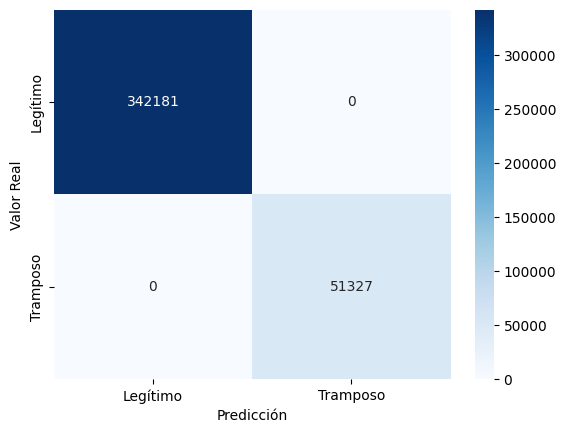


--- Top 15 Características Más Importantes ---
                     feature  importance
24               kills_total    0.162135
28      headshot_kills_total    0.144418
27              damage_total    0.108209
25              deaths_total    0.097034
26             assists_total    0.069852
17             active_weapon    0.049878
3                       tick    0.045617
2                          Z    0.044919
1                          Y    0.043027
22  next_primary_attack_tick    0.036509
0                          X    0.026995
31               armor_value    0.020631
14       usercmd_viewangle_y    0.020496
9                        yaw    0.019011
35               aim_punch_x    0.016162


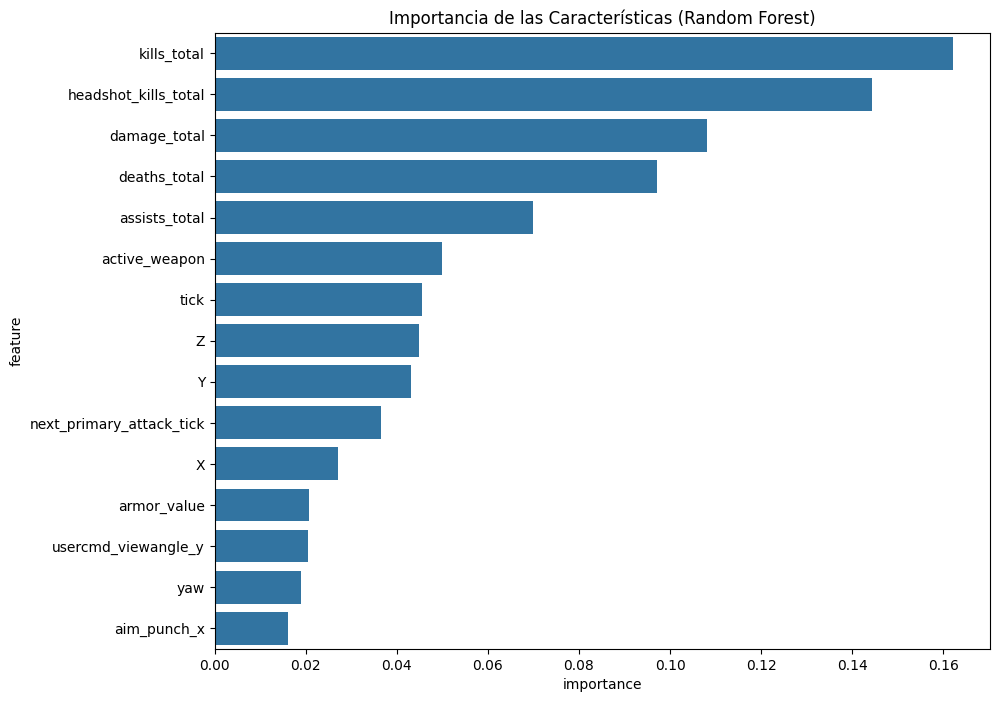

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar el dataset enriquecido
df = pd.read_csv('new_subset_test_cs2cd.csv')
print(f"Dataset original cargado. Forma: {df.shape}")

# ---------------------------------------------------------------------------
# NUEVA SECCIÓN: LIMPIEZA Y PREPROCESAMIENTO
# ---------------------------------------------------------------------------
print("Iniciando limpieza y preprocesamiento de datos...")

# Tarea 1: Manejar columnas de tipo 'object' que son vectores (como 'aim_punch_angle')
# Convertimos 'aim_punch_angle' en 2 columnas numéricas
if 'aim_punch_angle' in df.columns:
    df['aim_punch_angle'] = df['aim_punch_angle'].astype(str).fillna('[0 0]')
    split_df = df['aim_punch_angle'].str.strip('[]').str.split(expand=True)
    df[['aim_punch_x', 'aim_punch_y']] = split_df.iloc[:, :2] # Tomamos solo los 2 primeros componentes
    df['aim_punch_x'] = pd.to_numeric(df['aim_punch_x'], errors='coerce').fillna(0)
    df['aim_punch_y'] = pd.to_numeric(df['aim_punch_y'], errors='coerce').fillna(0)
    df = df.drop(columns=['aim_punch_angle'])
    print("Columna 'aim_punch_angle' procesada.")

# Tarea 2: Convertir columnas booleanas/categóricas de 'object' a números
# Columnas que son esencialmente True/False
for col in ['is_walking', 'FIRE', 'is_scoped']:
    if col in df.columns:
        # Asumimos que los valores no nulos y no 'False' significan True (1)
        df[col] = df[col].notna() & (df[col] != 'False')
        df[col] = df[col].astype(int)
print("Columnas booleanas como texto convertidas a 0/1.")
        
# Tarea 3: Eliminar columnas de texto que no usaremos en el modelo inicial
# Son identificadores, tienen demasiadas categorías o son complejas de procesar ahora
columnas_a_eliminar = ['steamid', 'spotted', 'approximate_spotted_by', 'map', 'server', 'avg_rank', 'match_making_type']
df = df.drop(columns=columnas_a_eliminar, errors='ignore')
print(f"Columnas de texto eliminadas: {columnas_a_eliminar}")

# Tarea 4: Imputar (rellenar) valores faltantes en las columnas numéricas
# Seleccionamos solo las columnas que son numéricas
columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
for col in columnas_numericas:
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
print("Valores faltantes (NaN) rellenados con la mediana de cada columna.")

print(f"Limpieza finalizada. Nueva forma del dataset: {df.shape}")
print("\nVerificación final de tipos de dato y nulos:")
df.info()
# ---------------------------------------------------------------------------


# 2. Definir las características (X) y el objetivo (y)
features = [col for col in df.columns if col != 'is_cheater']
X = df[features]
y = df['is_cheater']

# 3. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# --- El resto del código (Entrenamiento, Evaluación, etc.) sigue igual ---

# Entrenar el Modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nEntrenando el modelo Random Forest...")
rf_model.fit(X_train, y_train)
print("¡Entrenamiento completado!")

# Evaluar el Rendimiento
y_pred = rf_model.predict(X_test)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy (Precisión Global): {accuracy_score(y_test, y_pred):.4f}")

# Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legítimo', 'Tramposo'], yticklabels=['Legítimo', 'Tramposo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Importancia de las Características
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(15)

print("\n--- Top 15 Características Más Importantes ---")
print(top_features)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Importancia de las Características (Random Forest)')
plt.show()

is_cheater
0    1368722
1     205308
Name: count, dtype: int64


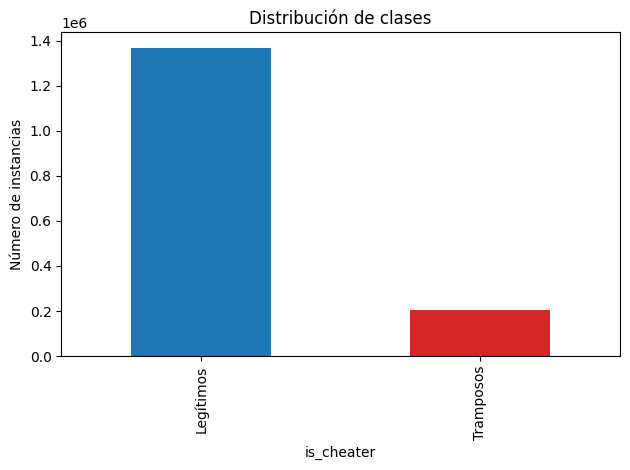

In [20]:
import matplotlib.pyplot as plt
class_counts = df['is_cheater'].value_counts().sort_index()
print(class_counts)
class_counts.plot(kind='bar', color=['C0','C3'])
plt.xticks([0,1], ['Legítimos','Tramposos'])
plt.ylabel('Número de instancias')
plt.title('Distribución de clases')
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import numpy as np
import time
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt

# --- PASO 1: CARGAR DATOS ---
print("--- Iniciando Proceso Completo con Modelo Híbrido ---")
try:
    # RECUERDA: Cambia 'tu_dataset_reducido.csv' por el nombre de tu archivo.
    df = pd.read_csv('subset_test_cs2cd.csv')
    print(f"Paso 1: Dataset cargado exitosamente. Forma: {df.shape}")
except FileNotFoundError:
    print("Error: No se encontró el archivo del dataset. Asegúrate de que el nombre es correcto.")
    exit()

# --- PASO 2: INGENIERÍA DE CARACTERÍSTICAS (PRE-KILL) ---
print("\nPaso 2: Iniciando ingeniería de características (pre-kill)...")
df['new_kill'] = df.groupby('steamid')['kills_total'].diff()
kill_events_df = df[df['new_kill'] == 1].copy()
df['variance_pre_kill'] = 0.0
df['suma_abs_pre_kill'] = 0.0

for index, kill_event in kill_events_df.iterrows():
    steam_id = kill_event['steamid']
    kill_tick = kill_event['tick']
    start_tick = kill_tick - 192 # Ventana de 3 segundos
    pre_kill_window_df = df[(df['steamid'] == steam_id) & (df['tick'] >= start_tick) & (df['tick'] < kill_tick)]
    if not pre_kill_window_df.empty:
        variance_dx = pre_kill_window_df['usercmd_mouse_dx'].var()
        variance_dy = pre_kill_window_df['usercmd_mouse_dy'].var()
        mouse_variance = np.nansum([variance_dx, variance_dy])
        abs_sum_dx = pre_kill_window_df['usercmd_mouse_dx'].abs().sum()
        abs_sum_dy = pre_kill_window_df['usercmd_mouse_dy'].abs().sum()
        mouse_abs_sum = abs_sum_dx + abs_sum_dy
        df.loc[index, 'variance_pre_kill'] = mouse_variance
        df.loc[index, 'suma_abs_pre_kill'] = mouse_abs_sum
df = df.drop(columns=['new_kill'])
print("Características 'pre-kill' añadidas con éxito.")

# --- PASO 3: LIMPIEZA Y PREPROCESAMIENTO ---
print("\nPaso 3: Iniciando limpieza y preprocesamiento de datos...")
# (Este bloque contiene toda la limpieza que discutimos)
if 'aim_punch_angle' in df.columns:
    df['aim_punch_angle'] = df['aim_punch_angle'].astype(str).fillna('[0 0]')
    split_df = df['aim_punch_angle'].str.strip('[]').str.split(expand=True)
    df[['aim_punch_x', 'aim_punch_y']] = split_df.iloc[:, :2]
    df['aim_punch_x'] = pd.to_numeric(df['aim_punch_x'], errors='coerce').fillna(0)
    df['aim_punch_y'] = pd.to_numeric(df['aim_punch_y'], errors='coerce').fillna(0)
    df = df.drop(columns=['aim_punch_angle'])

for col in ['is_walking', 'FIRE', 'is_scoped']:
    if col in df.columns:
        df[col] = (df[col].notna() & (df[col] != 'False')).astype(int)

columnas_a_eliminar = ['steamid', 'spotted', 'approximate_spotted_by', 'map', 'server', 'avg_rank', 'match_making_type']
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

columnas_numericas = df.select_dtypes(include=np.number).columns.tolist()
for col in columnas_numericas:
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
print("Limpieza y preprocesamiento finalizados.")


# --- PASO 4: ESCALADO Y CREACIÓN DE SECUENCIAS ---
print("\nPaso 4: Escalando y creando secuencias...")
features = [col for col in df.columns if col != 'is_cheater']
X = df[features]
y = df['is_cheater']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X).astype('float32')

def create_sequences(X, y, time_steps=64):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 32
X_seq, y_seq = create_sequences(X_scaled, y, TIME_STEPS)
print(f"Datos en secuencias creados. Forma de X: {X_seq.shape}")


# --- PASO 5: DIVISIÓN DE DATOS ---
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq)
print("Secuencias divididas para entrenamiento y prueba.")


# --- PASO 6: CONSTRUCCIÓN DEL MODELO HÍBRIDO (CNN + GRU) ---
print("\nPaso 6: Construyendo la arquitectura del modelo híbrido...")
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(GRU(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


# --- PASO 7: ENTRENAMIENTO DEL MODELO ---
print("\nPaso 7: Entrenando el modelo híbrido...")
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=1)
print("¡Entrenamiento completado!")


# --- PASO 8: EVALUACIÓN Y ANÁLISIS ---
print("\nPaso 8: Evaluando el rendimiento del modelo...")
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print("\n--- Reporte de Clasificación (Híbrido CNN+GRU) ---")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Legítimo', 'Tramposo'], yticklabels=['Legítimo', 'Tramposo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Híbrido CNN+GRU)')
plt.show()

print("\n--- Proceso Completo Finalizado ---")

--- Iniciando Proceso Completo con Modelo Híbrido ---


C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\3911533205.py:18: DtypeWarning: Columns (9,22,31,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('subset_test_cs2cd.csv')


Paso 1: Dataset cargado exitosamente. Forma: (1574030, 42)

Paso 2: Iniciando ingeniería de características (pre-kill)...
Características 'pre-kill' añadidas con éxito.

Paso 3: Iniciando limpieza y preprocesamiento de datos...


C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\3911533205.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana, inplace=True)
C:\Users\kilua\AppData\Local\Temp\ipykernel_14616\3911533205.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Limpieza y preprocesamiento finalizados.

Paso 4: Escalando y creando secuencias...
Datos en secuencias creados. Forma de X: (1573998, 32, 37)
Secuencias divididas para entrenamiento y prueba.

Paso 6: Construyendo la arquitectura del modelo híbrido...


C:\Users\kilua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │        11,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 50)             │        17,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,355 (114.67 KB)

 Trainable params: 29,355 (114.67 KB)

 Non-trainable params: 0 (0.00 B)


Paso 7: Entrenando el modelo híbrido...


MemoryError: Unable to allocate 5.00 GiB for an array with shape (1133278, 32, 37) and data type float32